Word Embedding chapter 2.1 assignment


In [1]:
with open('corpus/the-verdict.txt', 'r', encoding='utf-8') as file:
    raw_text = file.read()
print("Total number of characters in the file:", len(raw_text))
print(raw_text[:100])









Total number of characters in the file: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [2]:
import re 
text='hello, world! a;lkjf i know htat if happens'
result=re.split(r'(\s)',text)
print(result)









['hello,', ' ', 'world!', ' ', 'a;lkjf', ' ', 'i', ' ', 'know', ' ', 'htat', ' ', 'if', ' ', 'happens']


In [3]:
import re 
text='hello, world! a;lkjf i know htat if happens'
result2=re.split(r'([\s,;])',text)
print(result2)









['hello', ',', '', ' ', 'world!', ' ', 'a', ';', 'lkjf', ' ', 'i', ' ', 'know', ' ', 'htat', ' ', 'if', ' ', 'happens']


In [4]:
import re

# Read the text from the file
with open('corpus/the-verdict.txt', 'r', encoding='utf-8') as f:
    verdict_text = f.read()

# Use regex to split so that every word, whitespace, and special character is a separate token
# This will match words, whitespace, or any single non-whitespace, non-word character
tokens = re.findall(r'\w+|\s+|[^\w\s]', verdict_text)

# Print the first 50 tokens as a check
print(tokens[:500])



['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '-', '-', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '-', '-', 'so', ' ', 'it', ' ', 'was', ' ', 'no', ' ', 'great', ' ', 'surprise', ' ', 'to', ' ', 'me', ' ', 'to', ' ', 'hear', ' ', 'that', ',', ' ', 'in', ' ', 'the', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', ',', ' ', 'he', ' ', 'had', ' ', 'dropped', ' ', 'his', ' ', 'painting', ',', ' ', 'married', ' ', 'a', ' ', 'rich', ' ', 'widow', ',', ' ', 'and', ' ', 'established', ' ', 'himself', ' ', 'in', ' ', 'a', ' ', 'villa', ' ', 'on', ' ', 'the', ' ', 'Riviera', '.', ' ', '(', 'Though', ' ', 'I', ' ', 'rather', ' ', 'thought', ' ', 'it', ' ', 'would', ' ', 'have', ' ', 'been', ' ', 'Rome', ' ', 'or', ' ', 'Florence', '.', ')', '\n\n', '"', 'The', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', '"', '-', '-', 'that', ' ', 'was', ' ', 'what', ' ', 'the', ' ', 'women', ' '

In [5]:
tokens_no_whitespace = [token for token in tokens if not token.isspace()]
print(tokens_no_whitespace[:500])


['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '-', '-', 'though', 'a', 'good', 'fellow', 'enough', '-', '-', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '-', '-', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '-', '-', 'his', 'last', 'Chicago', 'sitter', '-', '-', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'thin

In [6]:
len(tokens_no_whitespace)

4827

In [7]:
all_words=sorted(set(tokens_no_whitespace))
vocab_size=len(all_words)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 1148


In [8]:
word_to_index = {word: idx for idx, word in enumerate(all_words)}
print(list(word_to_index.items())[:50])


[('!', 0), ('"', 1), ("'", 2), ('(', 3), (')', 4), (',', 5), ('-', 6), ('.', 7), (':', 8), (';', 9), ('?', 10), ('A', 11), ('Ah', 12), ('Among', 13), ('And', 14), ('Are', 15), ('Arrt', 16), ('As', 17), ('At', 18), ('Be', 19), ('Begin', 20), ('Burlington', 21), ('But', 22), ('By', 23), ('Carlo', 24), ('Chicago', 25), ('Claude', 26), ('Come', 27), ('Croft', 28), ('Destroyed', 29), ('Devonshire', 30), ('Don', 31), ('Dubarry_', 32), ('Emperors', 33), ('Florence', 34), ('For', 35), ('Gallery', 36), ('Gideon', 37), ('Gisburn', 38), ('Gisburns', 39), ('Grafton', 40), ('Greek', 41), ('Grindle', 42), ('Grindles', 43), ('HAD', 44), ('Had', 45), ('Hang', 46), ('Has', 47), ('He', 48), ('Her', 49)]


In [9]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_idx = {word: idx for idx, word in enumerate(vocab)}
        self.idx_to_str = {idx: word for word, idx in self.str_to_idx.items()}
        self.unk_token = "<unk>" if "<unk>" in self.str_to_idx else None

    def encode(self, text):
        preprocessed_text = re.sub(r'[^\w\s]', '', text)
        words = preprocessed_text.split()
        if self.unk_token is not None:
            return [self.str_to_idx[word] if word in self.str_to_idx else self.str_to_idx[self.unk_token] for word in words]
        else:
            return [self.str_to_idx[word] for word in words]

    def decode(self, ids):
        text = ' '.join([self.idx_to_str[idx] if idx in self.idx_to_str else (self.unk_token if self.unk_token is not None else '') for idx in ids])
        text = re.sub(r'\s+', ' ', text)
        return text.strip()


In [10]:
# Let's test the SimpleTokenizerV1 class with a sample text
# Ensure the sample text only contains words from the vocab
sample_text = "I had always thought Jack Gisburn rather a cheap good fellow enough so it was no great surprise to me to hear that in the height of his glory he had dropped his painting married a rich widow and established himself in a villa on the Riviera"
tokenizer = SimpleTokenizerV1(all_words)

# Encode the sample text
encoded = tokenizer.encode(sample_text)
print("Encoded:", encoded)

# Decode the encoded ids
decoded = tokenizer.decode(encoded)
print("Decoded:", decoded)


Encoded: [53, 530, 163, 1021, 57, 38, 835, 129, 271, 518, 452, 410, 925, 599, 1096, 723, 524, 979, 1034, 676, 1034, 548, 1005, 582, 1006, 551, 736, 562, 514, 546, 530, 388, 562, 762, 674, 129, 858, 1120, 170, 415, 560, 582, 129, 1085, 741, 1006, 84]
Decoded: I had always thought Jack Gisburn rather a cheap good fellow enough so it was no great surprise to me to hear that in the height of his glory he had dropped his painting married a rich widow and established himself in a villa on the Riviera


In [11]:
# Add special tokens to the vocabulary and update the mappings
special_tokens = ['<eot>', '<unk>']
for token in special_tokens:
    if token not in all_words:
        all_words.append(token)

# Update vocab_size
vocab_size = len(all_words)
print(f"Vocabulary size (with special tokens): {vocab_size}")



# Show the last few entries to confirm special tokens are present
print("Last 5 vocab entries:", list(word_to_index.items())[-5:])


Vocabulary size (with special tokens): 1150
Last 5 vocab entries: [('yet', 1143), ('you', 1144), ('younger', 1145), ('your', 1146), ('yourself', 1147)]


In [12]:
text1='hello, world! a;lkjf i know htat if happens'
text2="In the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera."

text="<eot>".join([text1,text2])
print(text)











hello, world! a;lkjf i know htat if happens<eot>In the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera.


In [13]:
tokenizer=SimpleTokenizerV1(all_words)

print(tokenizer.encode(text))










[1149, 1149, 1149, 1149, 609, 1149, 580, 1149, 1006, 551, 736, 562, 514, 546, 530, 388, 562, 762, 674, 129, 858, 1120, 170, 415, 560, 582, 129, 1085, 741, 1006, 84]


In [14]:
import tiktoken

# Common choices:
# - "cl100k_base": used by GPT-4/3.5 Turbo
# - "gpt2": used by GPT‑2/3 legacy
enc = tiktoken.get_encoding("cl100k_base")

text = "Hello, world! The Verdict by Edith Wharton."
ids = enc.encode(text)                 # list of token ids
print(ids, len(ids))
print(enc.decode(ids))                 # back to string

[9906, 11, 1917, 0, 578, 6383, 8644, 555, 3279, 411, 1254, 80596, 13] 13
Hello, world! The Verdict by Edith Wharton.


In [15]:
decoded_text = enc.decode(ids)
print(decoded_text)


Hello, world! The Verdict by Edith Wharton.


In [16]:
with open('corpus/the-verdict.txt', 'r') as file:
    raw_text = file.read()


enc_text=enc.encode(raw_text)
print(len(enc_text))




4943


In [17]:
sample_100 = enc_text[:100]
print(sample_100)


[40, 473, 1846, 2744, 3463, 7762, 480, 285, 22464, 4856, 264, 12136, 35201, 313, 4636, 264, 1695, 12637, 3403, 313, 708, 433, 574, 912, 2294, 13051, 311, 757, 311, 6865, 430, 11, 304, 279, 2673, 315, 813, 27025, 11, 568, 1047, 12504, 813, 19354, 11, 12502, 264, 9257, 57896, 11, 323, 9749, 5678, 304, 264, 47625, 389, 279, 51768, 26919, 13, 320, 27831, 358, 4856, 3463, 433, 1053, 617, 1027, 22463, 477, 48606, 9456, 10227, 2673, 315, 813, 27025, 75857, 9210, 574, 1148, 279, 3278, 2663, 433, 13, 358, 649, 6865, 18083, 13, 480, 100242, 666, 24510, 313, 26301, 1566]


In [18]:
context_size=4

x=enc_text[:context_size]


In [19]:
import torch
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)  #1

        for i in range(0, len(token_ids) - max_length, stride):  #2
            input_chunk = token_ids[i : i + max_length]
            target_chunk = token_ids[i + 1 : i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):  #3
        return len(self.input_ids)

    def __getitem__(self, idx):  #4
        return self.input_ids[idx], self.target_ids[idx]
        

In [20]:
dataset=GPTDatasetV1(txt=raw_text,tokenizer=enc,max_length=4,stride=10)

In [21]:
len(dataset)




494

In [22]:
import torch
import torch.nn as nn

# Define a simple embedding layer
vocab_size =50257 # assuming enc_text contains all token ids
embedding_dim = 256  # you can choose any dimension

embedding_layer = nn.Embedding(vocab_size, embedding_dim)

# Example: get embeddings for the first 10 tokens
input_tokens = torch.tensor(enc_text[:10])
embeddings = embedding_layer(input_tokens)
print(embeddings)


tensor([[ 1.2060, -0.7730, -0.0956,  ..., -0.4125, -2.7102,  0.3494],
        [ 1.6967, -0.2756, -0.4620,  ..., -1.1007, -0.2496,  0.5449],
        [-0.8040, -0.0762,  0.7493,  ..., -1.4044, -0.5454, -0.7256],
        ...,
        [-2.1472,  0.8617,  1.7225,  ...,  0.1360, -0.8286, -0.5756],
        [ 0.9590, -1.3280,  0.6165,  ..., -0.5281,  0.7335, -0.8516],
        [ 0.9699,  1.3338, -0.0244,  ..., -0.0155,  0.1764, -1.0619]],
       grad_fn=<EmbeddingBackward0>)


In [23]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )
    return dataloader

max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)


Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [24]:
token_embeddings=embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


absolute embeddings layer

In [25]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length,embedding_dim)
positional_embeddings=pos_embedding_layer(torch.arange(context_length))
print(positional_embeddings)

tensor([[ 0.3677, -0.7716, -1.2460,  ..., -0.3170,  1.0472,  0.1746],
        [-0.5792,  1.2155, -0.9391,  ...,  1.1642, -0.9020,  0.4881],
        [ 1.2584,  1.1623,  0.1212,  ...,  1.2759, -0.3133, -0.5376],
        [-1.6087, -0.5998,  0.2156,  ...,  0.8640, -0.6135, -0.1138]],
       grad_fn=<EmbeddingBackward0>)


In [26]:
input_embeddings=positional_embeddings+token_embeddings

print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [27]:
query = torch.empty(input_embeddings.shape)
query.shape
attention_table_col=input_embeddings.shape[1]
attention_table_row=input_embeddings.shape[1]
attention_scores = torch.empty(8,attention_table_row,attention_table_col)
attention_weights = torch.empty(8,attention_table_row,attention_table_col)


for i,element in enumerate(input_embeddings):
    attention_scores[i]=element@element.T
    attention_weights[i]=torch.softmax(attention_scores[i],dim=1)
    # print(attention_weights)
    print(attention_weights[i].sum(dim=1))
    print(attention_weights[i].shape)
    # print(attention_weights.shape)
    query[i]=attention_weights[i]@element
    




tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])


In [28]:
torch.manual_seed(72)
d_in=256
d_out=72
W_query=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_key=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_value=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)




In [29]:
input_vector = input_embeddings[0][0]
print(input_vector.reshape(1, -1))

tensor([[ 1.5738e+00, -1.5446e+00, -1.3416e+00,  2.2832e+00,  3.2760e-01,
         -5.3140e-01,  8.0076e-01, -2.0718e+00,  6.1869e-01,  2.3539e+00,
         -5.2623e-01,  6.6519e-01,  1.1894e+00, -6.6742e-01,  1.1912e-01,
         -9.8694e-01, -3.6799e-01, -6.5455e-01,  2.8671e-01, -9.2966e-01,
         -3.9233e-01,  1.0611e+00, -1.6656e+00, -2.9830e-01,  3.4479e-02,
         -2.3252e+00, -1.6360e-02, -9.2208e-01, -1.5888e+00,  4.5009e-01,
         -3.5212e-01, -6.5870e-01,  1.9800e-01,  2.8837e-01,  1.0238e-01,
         -6.2013e-01, -3.3726e-01,  8.5320e-01,  1.5771e-01, -4.2256e-02,
         -8.6635e-01, -1.5051e+00, -1.3834e+00,  4.6603e-01,  3.2206e-03,
          1.3905e+00,  1.8948e-01,  2.7524e+00, -1.0689e+00,  2.3589e+00,
         -2.1581e+00,  2.2053e+00, -1.3288e+00, -5.1899e-01, -2.6223e+00,
         -1.3026e+00,  1.8097e-01,  8.7213e-01,  3.3764e-01,  8.2571e-01,
         -1.5987e+00,  2.3836e+00,  2.8683e+00, -2.4877e-01, -3.3664e+00,
         -2.9248e-01, -2.0043e-01,  2.

In [30]:
input_to_query=input_vector@W_query
input_to_key=input_vector@W_key
input_to_value=input_vector@W_value


In [31]:
print(input_to_query.shape)

torch.Size([72])


In [32]:
inputs_to_querys=input_embeddings@W_query
inputs_to_keys=input_embeddings@W_key
inputs_to_values=input_embeddings@W_value

In [33]:
print(inputs_to_querys.shape)
print(inputs_to_keys.shape)

torch.Size([8, 4, 72])
torch.Size([8, 4, 72])


In [34]:
query_key_attention_scores=inputs_to_querys@inputs_to_keys.transpose(1,2)

In [35]:

d_k=inputs_to_keys.shape[-1]
print(d_k)
query_key_attention_scores_normalized=torch.softmax(query_key_attention_scores/d_k**0.5,dim=-1)

72


In [36]:
context_vector=query_key_attention_scores_normalized@inputs_to_values

In [37]:
print(context_vector.shape)

torch.Size([8, 4, 72])


In [38]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super.__init__()
        self.W_query=torch.nn.Parameter(torch.rand(d_in,d_out))
        self.W_key=torch.nn.Parameter(torch.rand(d_in,d_out))
        self.W_value=torch.nn.Parameter(torch.rand(d_in,d_out))
        
        
    def forward(self,x):
        queries=x@self.W_query
        keys=x@self.W_key
        values=x@self.W_values
        
        attention_scores=queries@keys.T
        attention_weights=torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
        context_vectors=attention_weights@values
        return context_vectors
        
        



In [39]:

#  Just used nn.Linear for better activation. 



class SelfAttention_v2(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super.__init__()
        self.W_query=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value=nn.Linear(d_in,d_out,bias=qkv_bias)
    def forward(self,X):
        queries=x@self.W_query
        keys=x@self.W_key
        values=x@self.W_values
        
        attention_scores=queries@keys.T
        attention_weight=torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
        context_vectors=attention_weight@values
        return context_vectors
        

In [40]:
class CausalAttention(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super.__init__()
        self.W_query=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value=nn.Linear(d_in,d_out,bias=qkv_bias)
    
    def forward(self,x):
        queries=x@self.W_query
        keys=x@self.W_key
        values=x@self.W_value
        
        attention_scores=queries@keys.T
        mask=torch.ones(attention_scores.shape[0],attention_scores.shape[1])
        mask=torch.triu(mask)
        attention_scores[mask==1]=torch.tensor(-float('inf'))
        attention_weight=torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
        # drop out here
        # The 'train' parameter specifies whether dropout should behave in training mode (drop values) or evaluation mode (no dropout).
        # In PyTorch, when train=True, dropout is applied; when train=False, dropout is bypassed.
        attention_weight = torch.dropout(attention_weight, p=0.5, train=self.training)
        context_vectors=attention_weight@values
        return context_vectors

In [41]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self,d_in,d_out,context_length,drop_out,num_heads,qkv_bias=False):
        super().__init__()
        self.heads=nn.ModuleList([CausalAttention(d_in,d_out,context_length,drop_out,qkv_bias)for _ in range(num_heads)])
    def forward(self,x):
        return torch.cat([head(x) for head in self.heads],dim=-1)
        

In [42]:
# The code in the image and your code are very similar, but there are a few key differences and some mistakes in your implementation.
# Here is a version that matches the code in the image, with comments on the differences:

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, drop_out, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"
        self.d_out = d_out  
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.drop_out = nn.Dropout(drop_out)
        self.out_proj = nn.Linear(d_out, d_out, bias=qkv_bias)  # ✅ Use qkv_bias for consistency
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    # ... rest of forward method stays the same
    def forward(self, x):
        b, num_tokens, d_in = x.shape

        # Linear projections
        keys = self.W_key(x)      # (b, num_tokens, d_out)
        values = self.W_value(x)  # (b, num_tokens, d_out)
        queries = self.W_query(x) # (b, num_tokens, d_out)

        # Reshape for multi-head: (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose to (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Attention score: (b, num_heads, num_tokens, num_tokens)
        attn_scores = queries @ keys.transpose(2, 3)

        # Apply mask (causal)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores = attn_scores.masked_fill(mask_bool, -torch.inf)

        # Scale and softmax
        attn_weights = torch.softmax(attn_scores / (self.head_dim ** 0.5), dim=-1)
        attn_weights = self.drop_out(attn_weights)

        # Weighted sum
        context_vec = (attn_weights @ values).transpose(1, 2)  # (b, num_tokens, num_heads, head_dim)
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec


In [43]:
gpt_configuration = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [44]:
import torch 
import torch.nn as nn

class Dummy_Scratch_gpt_model(nn.Module):
    def __init__(self, configuration):
        
        super().__init__()
        
        self.token_embedding = nn.Embedding(configuration["vocab_size"], configuration["emb_dim"])
        self.pos_emb = nn.Embedding(configuration["context_length"], configuration["emb_dim"])
        self.drop_emb = nn.Dropout(configuration["drop_rate"])
        
        self.transformer_blocks = nn.Sequential(
            *[Dummy_Transformer_Block(configuration) for _ in range(configuration["n_layers"])]
        )
    
        self.final_norm = Dummay_Layer_normalization(configuration["emb_dim"])
        self.out_head = nn.Linear(configuration["emb_dim"], configuration["vocab_size"], bias=False)
        
    def forward(self, in_dx):
        batch_size, seq_len = in_dx.shape
        tok_embeddings = self.token_embedding(in_dx)
        pos_embeddings = self.pos_emb(torch.arange(seq_len, device=in_dx.device))
        x = tok_embeddings + pos_embeddings
        x = self.drop_emb(x)
        x = self.transformer_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0 / torch.pi, device=x.device)) * (x + 0.044715 * torch.pow(x, 3))))

class Dummy_FeedForward(nn.Module):
    def __init__(self, emb_dim, hidden_dim=None, drop_rate=0.1, bias=True):  # ✅ Added bias parameter
        super().__init__()
        if hidden_dim is None:
            hidden_dim = emb_dim * 4
        self.fc1 = nn.Linear(emb_dim, hidden_dim, bias=bias)       # ✅ Use bias parameter
        self.gelu = GELU()
        self.fc2 = nn.Linear(hidden_dim, emb_dim, bias=bias)       # ✅ Use bias parameter
        self.dropout = nn.Dropout(drop_rate)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.gelu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return x

class Dummy_SelfAttention(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.mha = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            drop_out=cfg["drop_rate"],
            num_heads=cfg["n_heads"],
            qkv_bias=cfg["qkv_bias"]
        )
        
    def forward(self, x):
        return self.mha(x)

class Dummy_Transformer_Block(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.ln1 = Dummay_Layer_normalization(cfg["emb_dim"])
        self.attn = Dummy_SelfAttention(cfg)
        self.ln2 = Dummay_Layer_normalization(cfg["emb_dim"])
        # ✅ Pass bias setting from config to feedforward
        self.ff = Dummy_FeedForward(cfg["emb_dim"], drop_rate=cfg["drop_rate"], bias=cfg["qkv_bias"])
        
    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.ff(self.ln2(x))
        return x

class Dummay_Layer_normalization(nn.Module):
    def __init__(self, emb_dim, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
        
    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        var = x.var(-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [45]:
import tiktoken

tokenizer=tiktoken.get_encoding("gpt2")

batch=[]
str1 = "This is the first string."
str2 = "This is the second string."

batch.append(tokenizer.encode(str1))
batch.append(tokenizer.encode(str2))

In [46]:
torch.manual_seed(22)
model = Dummy_Scratch_gpt_model(gpt_configuration)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameter count:", total_params)

# Count parameters in all transformer blocks
transformer_params = 0
ff_params = 0

for name, module in model.named_modules():
    if isinstance(module, Dummy_Transformer_Block):
        # All params in this transformer block
        transformer_params += sum(p.numel() for p in module.parameters())
        # Params in the feedforward submodule of this block
        ff_params += sum(p.numel() for p in module.ff.parameters())

print("Total parameters in all transformer blocks:", transformer_params)
print("Total parameters in all feedforward networks inside transformer blocks:", ff_params)


Total parameter count: 162364416
Total parameters in all transformer blocks: 84971520
Total parameters in all feedforward networks inside transformer blocks: 56623104


In [47]:
# Compute the memory usage of the model (in megabytes)
memory_bytes = sum(p.numel() * p.element_size() for p in model.parameters())
memory_mb = memory_bytes / (1024 * 1024)
print("Total model memory (MB):", memory_mb)


Total model memory (MB): 619.37109375


In [48]:

sample_input = torch.randn(2, 5, 768)  # (batch, seq_len, emb_dim)
transformer_block = Dummy_Transformer_Block(gpt_configuration)
output = transformer_block(sample_input)
print("Input shape:", sample_input.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([2, 5, 768])
Output shape: torch.Size([2, 5, 768])


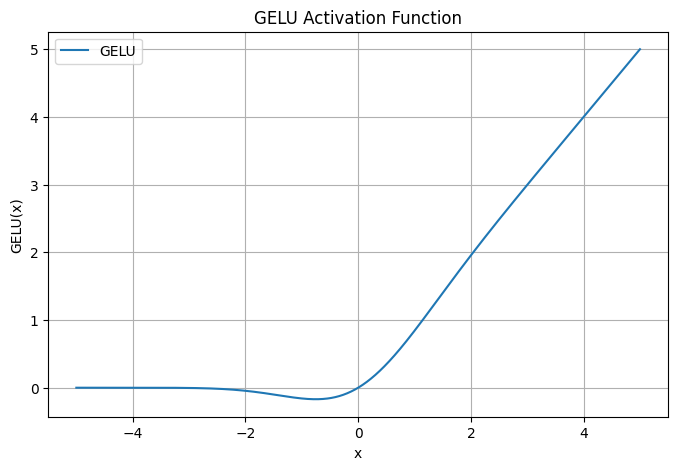

In [49]:
import torch
import matplotlib.pyplot as plt
import numpy as np

gelu = GELU()

x = torch.linspace(-5, 5, 1000)
y = gelu(x)

plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), y.detach().numpy(), label="GELU")
plt.title("GELU Activation Function")
plt.xlabel("x")
plt.ylabel("GELU(x)")
plt.grid(True)
plt.legend()
plt.show()


In [50]:
def inference_time_prediction(model,input_sequence,max_token_window,context_size):
    
    for _ in range(max_token_window):
        input_sequence_to_model=input_sequence[:,-context_size:]
        with torch.no_grad():
            logits=model(input_sequence_to_model)
        logits=logits[:,-1,:]
        # probs=logits
        logits=torch.argmax(torch.softmax(logits,dim=-1),dim=-1,keepdim=True)
        input_sequence=torch.cat((input_sequence,logits),dim=1)
        
    return input_sequence
        
            

In [51]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0)  # #1 Adds batch dimension
print("encoded_tensor.shape:", encoded_tensor.shape)


encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [52]:
model.eval()

out=inference_time_prediction(model,encoded_tensor,15,gpt_configuration["context_length"])

print(out)
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)


tensor([[15496,    11,   314,   716,  3240, 13335, 48941, 21769, 35479,  1021,
         14936, 42517, 38897, 39647, 33493, 37690, 49776,  6687, 12180]])
Hello, I am townappropriate Gauntlet observingMonitor hand sail querExperts997 SELECT mogulobook manage filing


In [53]:
import torch


GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,  # 1
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,       # 2
    "qkv_bias": False
}

torch.manual_seed(123)
model = Dummy_Scratch_gpt_model(GPT_CONFIG_124M)
model.eval()


Dummy_Scratch_gpt_model(
  (token_embedding): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (transformer_blocks): Sequential(
    (0): Dummy_Transformer_Block(
      (ln1): Dummay_Layer_normalization()
      (attn): Dummy_SelfAttention(
        (mha): MultiHeadAttention(
          (W_query): Linear(in_features=768, out_features=768, bias=False)
          (W_key): Linear(in_features=768, out_features=768, bias=False)
          (W_value): Linear(in_features=768, out_features=768, bias=False)
          (drop_out): Dropout(p=0.1, inplace=False)
          (out_proj): Linear(in_features=768, out_features=768, bias=False)
        )
      )
      (ln2): Dummay_Layer_normalization()
      (ff): Dummy_FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=False)
        (gelu): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (

In [54]:
import tiktoken

def text_to_token(text,tokenizer):
    encoded=tokenizer.encode(text,allowed_special={'<|endoftext|>'})
    encoded_tensor=torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor
def token_to_text(token,tokenizer):
    flat=token.squeeze(0)
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = inference_time_prediction(
        model,
        text_to_token(start_context, tokenizer),
        10,
        GPT_CONFIG_124M["context_length"]
    )
print("Output text:\n", token_to_text(token_ids, tokenizer))

        

Output text:
 Every effort moves youitude stal operatingiru managers donate Zip strengths ingenuityclaw


In [55]:
# Generate some text and call the model

# Define a new prompt for generation
prompt = "The future of artificial intelligence is"

# Tokenize the prompt and convert to tensor
tokenizer = tiktoken.get_encoding("gpt2")
encoded = tokenizer.encode(prompt)
prompt_tensor = torch.tensor(encoded[:5]).unsqueeze(0)  # Add batch dimension

# Now pass the tensor to the model
probs = model(prompt_tensor)
# Implement similar logic to get the probabilities of the target tokens in the generated text

import torch.nn.functional as F

# Get the model's output probabilities (logits -> probabilities)
probs_softmax = F.softmax(probs, dim=-1)

# For demonstration, let's get the probability of the next token at each position in the prompt
# The "target" for each position is the next token in the prompt (shifted by 1)
# For the last token, there is no next token, so we limit to len(encoded) - 1
targets = encoded[1:]  # next tokens
token_indices = list(range(len(targets)))  # positions 0 to len(targets)-1
batch_idx = 0  # batch size is 1

# Gather the probabilities for the target tokens at each position
target_probas = probs_softmax[batch_idx, token_indices, targets]
print("Target token probabilities for each position:", target_probas)

Target token probabilities for each position: tensor([1.2939e-05, 1.4286e-05, 1.2428e-05, 1.0439e-05, 1.7014e-05],
       grad_fn=<IndexBackward0>)


In [56]:
import torch

# Compute the log and then mean of the target probabilities
log_target_probas = torch.log(target_probas)
mean_log_target_probas = -1*log_target_probas.mean()
print("Mean log target probability:", mean_log_target_probas)


Mean log target probability: tensor(11.2317, grad_fn=<MulBackward0>)


In [57]:
print("probs shape:", probs.shape)
print("targets shape:", torch.tensor(targets).shape)
loss = torch.nn.functional.cross_entropy(probs.flatten(0,1), torch.tensor(targets))

probs shape: torch.Size([1, 5, 50257])
targets shape: torch.Size([5])


In [58]:
print(loss)

tensor(11.2317, grad_fn=<NllLossBackward0>)


In [59]:
# Tokenize the raw_text and print the vocabulary size
tokenizer = tiktoken.get_encoding("gpt2")
tokens = tokenizer.encode(raw_text)
print("Number of tokens in raw_text:", len(tokens))
print("Vocabulary size:", tokenizer.n_vocab)

Number of tokens in raw_text: 5145
Vocabulary size: 50257


In [60]:
training_ratio = 0.9
split_index = int(training_ratio * len(raw_text))
train_data = raw_text[:split_index]
test_data = raw_text[split_index:]

# Create dataloaders for train and test
train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=gpt_configuration["context_length"],
    stride=gpt_configuration["context_length"],
    shuffle=True,
    num_workers=0
)
test_loader = create_dataloader_v1(
    test_data,
    batch_size=2,
    max_length=gpt_configuration["context_length"],
    stride=gpt_configuration["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [61]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)
    
    

print("\nValidation loader:")
for x, y in test_loader:
    print(x.shape, y.shape)
    


Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])


In [62]:
def calc_loss_batch(input_batch,output_batch,device,model):
    input_batch=input_batch.to(device)
    output_batch=output_batch.to(device)
    probs=model(input_batch)
    loss=torch.nn.functional.cross_entropy(probs.flatten(0,1),output_batch.flatten())
    return loss

In [63]:
def calc_loss_on_loader(loader, device, model):
    model.eval()
    total_loss = 0.0
    total_batches = 0
    with torch.no_grad():
        for input_batch, output_batch in loader:
            loss = calc_loss_batch(input_batch, output_batch, device, model)
            total_loss += loss.item()
            total_batches += 1
    avg_loss = total_loss / total_batches if total_batches > 0 else 0.0
    return avg_loss


In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
with torch.no_grad():
    train_loss = calc_loss_on_loader(train_loader, device, model)
    val_loss = calc_loss_on_loader(test_loader, device, model)
print("Training loss:", train_loss)
print("Validation loss:", val_loss)


Training loss: 10.987738291422525
Validation loss: 11.000211715698242


In [65]:
def evaluate_model(model,train_loader,test_loader,device,eval_iter):
    model.to(device)
    model.eval()
    
    with torch.no_grad():
        train_loss = calc_loss_on_loader(train_loader, device, model)
        val_loss = calc_loss_on_loader(test_loader, device, model)
        
    model.train()
    return train_loss,val_loss

In [66]:
def generate_and_print_sample(model,tokenizer,device,start_context):
    model.eval()
    context_size=model.pos_emb.weight.shape[0]
    encoded=text_to_token(start_context,tokenizer).to(device)
    with torch.no_grad():
        token_ids=inference_time_prediction(model=model,input_sequence=encoded,max_token_window=50,context_size=context_size)
    decoded_text=token_to_text(token_ids,tokenizer)
    print(decoded_text)
    model.train()
    
    

In [67]:
def train_model(model,optimizer,tokenizer,device,no_of_epoches,train_loader,test_loader,eval_iter,eval_frequency):
    
    trainlosses,testlosses,track_token_seen=[],[],[]
    token_seen,global_step=0,-1
    
    for epoches in range(no_of_epoches):
        model.train()
        for input_batch,target_batch in train_loader:
            optimizer.zero_grad()
            loss=calc_loss_batch(input_batch,target_batch,device,model)
            loss.backward()
            optimizer.step()
            token_seen+=input_batch.numel()
            global_step+=1
            
            if global_step % eval_frequency==0:
            
                train_loss, test_loss=evaluate_model(model,train_loader,test_loader,device,eval_iter)
                trainlosses.append(train_loss)
                testlosses.append(test_loss)
                
                track_token_seen.append(token_seen)
                print(f"Ep {epoches+1}: (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, "
                      f"val loss {test_loss:.3f}"
                )
                generate_and_print_sample(
                    model, tokenizer, device, start_context
                )
                
    return trainlosses,testlosses,track_token_seen
        

In [68]:
torch.manual_seed(123)
model = Dummy_Scratch_gpt_model(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.0004, weight_decay=0.1
)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model(
    model, optimizer, tokenizer, device,
    no_of_epoches=num_epochs,
    train_loader=train_loader,
    test_loader=test_loader,
    eval_iter=5,
    eval_frequency=5
)


Ep 1: (Step 000000): Train loss 9.823, val loss 9.998
Every effort moves you, I, and I













































Ep 1: (Step 000005): Train loss 8.084, val loss 8.278
Every effort moves you,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ep 2: (Step 000010): Train loss 6.725, val loss 7.063
Every effort moves you,,,,,,,,,,,,,.




































Ep 2: (Step 000015): Train loss 6.095, val loss 6.588
Every effort moves you.

















































Ep 3: (Step 000020): Train loss 5.792, val loss 6.522
Every effort moves you, the, the, the, the, the, the, the, the,, the, the, the,, the,,, the, the, the,, the, the,, the, the, the,,, the
Ep 3: (Step 000025): Train loss 5.471, val loss 6.527
Every effort moves you--"I to the"I was a to the Gisburn.
"I I had been--I G"I to the.
"I the Gisburn.
"I to the picture and I had been to the G
Ep 4: (Step 000030): Train loss 5.064, val loss 6.349
Every effort moves you that he was the







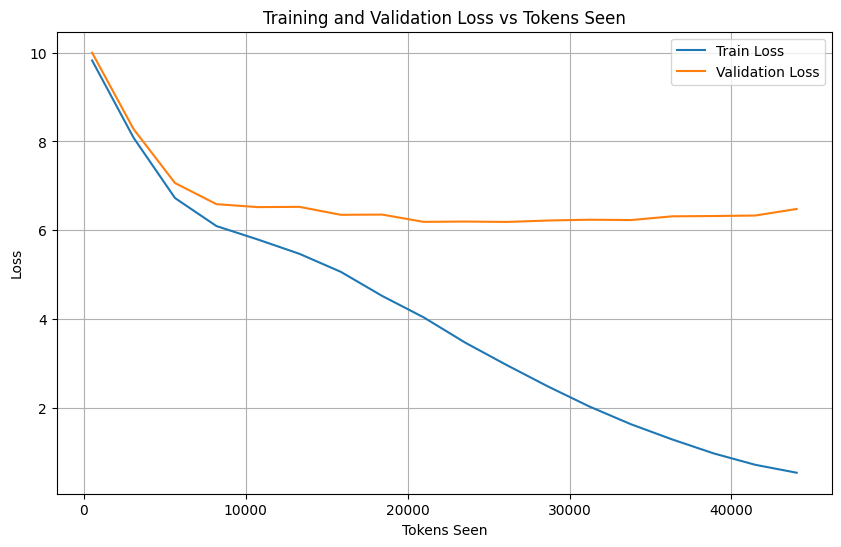

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(tokens_seen, train_losses, label='Train Loss')
plt.plot(tokens_seen, val_losses, label='Validation Loss')
plt.xlabel('Tokens Seen')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Tokens Seen')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
print(f"Training is being performed on device: {device}")


Training is being performed on device: cuda


In [71]:
model.to("cpu")
model.eval()

Dummy_Scratch_gpt_model(
  (token_embedding): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (transformer_blocks): Sequential(
    (0): Dummy_Transformer_Block(
      (ln1): Dummay_Layer_normalization()
      (attn): Dummy_SelfAttention(
        (mha): MultiHeadAttention(
          (W_query): Linear(in_features=768, out_features=768, bias=False)
          (W_key): Linear(in_features=768, out_features=768, bias=False)
          (W_value): Linear(in_features=768, out_features=768, bias=False)
          (drop_out): Dropout(p=0.1, inplace=False)
          (out_proj): Linear(in_features=768, out_features=768, bias=False)
        )
      )
      (ln2): Dummay_Layer_normalization()
      (ff): Dummy_FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=False)
        (gelu): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (

In [72]:
token_ids = inference_time_prediction(
    model=model,
    input_sequence=text_to_token("Very effort moves you", tokenizer),
    max_token_window=25,
    
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_to_text(token_ids, tokenizer))


Output text:
 Very effort moves you?"

"Yes--quite insensible to the fact with equanimity. Poor Jack Gisburn! The women


In [73]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}
inverse_vocab = {v: k for k, v in vocab.items()}


In [74]:
def inference_time_prediction_returned_logits(model,input_sequence,max_token_window,context_size):
    
    all_logits=[]
    for _ in range(max_token_window):
        input_sequence_to_model=input_sequence[:,-context_size:]
        with torch.no_grad():
            logits=model(input_sequence_to_model)
        logits=logits[:,-1,:]
        # probs=logits
        all_logits.append(logits)
        
        
        
    return all_logits
        
            

In [75]:
predicted_text=inference_time_prediction_returned_logits(model,torch.tensor(tokenizer.encode("every effort moves you")).unsqueeze(0),4,gpt_configuration["context_length"])

In [76]:
predicted_text[0].shape

torch.Size([1, 50257])

In [77]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)


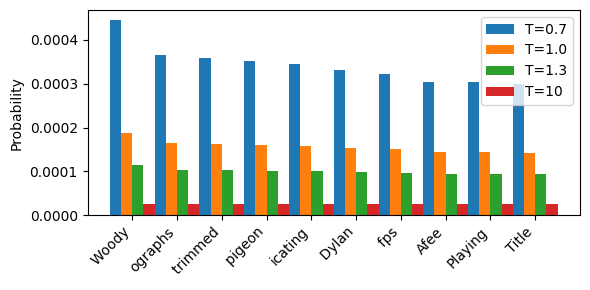

In [78]:
temperatures = [0.7, 1.0, 1.3,10]
top_k = 10
vocab_logits = probs[0, -1].detach()
idx = torch.topk(vocab_logits, top_k).indices
labels = [tokenizer.decode([i.item()]) for i in idx]
scaled_probas = [softmax_with_temperature(vocab_logits, T)[idx].detach().cpu().numpy() for T in temperatures]

x = np.arange(top_k)
bar_width = 0.25
fig, ax = plt.subplots(figsize=(6, 3))
for i, T in enumerate(temperatures):
    ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'T={T}')
ax.set_xticks(x + (len(temperatures)-1)*bar_width/2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Probability')
ax.legend()
plt.tight_layout()
plt.show()

In [79]:
def generate(model, input_text, max_new, context_size, temperature=1.0, top_k=None, eos_id=None):
    
    model.eval()
    for i in range(max_new):
        if input_text.shape[1] > context_size:
            text = input_text[:, -context_size:]
        else:
            text = input_text
        with torch.no_grad():
            
            logits = model(text)
        logits = logits[:, -1, :]
        
        if top_k is not None:
            top_logits = torch.topk(logits, top_k)
            min_val = top_logits.values[:, -1:]  # ✅ Fixed: access .values first
            logits = torch.where(logits < min_val, torch.tensor(float('-inf')).to(logits.device), logits)  # Also fixed float('inf') to float('-inf')
        
        if temperature > 0.0:
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1)
            next_input = torch.multinomial(probs, num_samples=1)
        else: 
            next_input = torch.argmax(logits, dim=-1, keepdim=True)
        
        if eos_id is not None and next_input.item() == eos_id:  # ✅ Fixed: proper eos_id check
            break
        
        input_text = torch.cat((input_text, next_input), dim=1)
                
    
    return input_text

In [80]:
# When saving (cell 84), this is already correct:
torch.save(model.state_dict(), "model.pth")

# When loading, use weights_only=True (default):
model2 = Dummy_Scratch_gpt_model(GPT_CONFIG_124M)
model2.load_state_dict(torch.load("model.pth", map_location=device))
model2.eval()

Dummy_Scratch_gpt_model(
  (token_embedding): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (transformer_blocks): Sequential(
    (0): Dummy_Transformer_Block(
      (ln1): Dummay_Layer_normalization()
      (attn): Dummy_SelfAttention(
        (mha): MultiHeadAttention(
          (W_query): Linear(in_features=768, out_features=768, bias=False)
          (W_key): Linear(in_features=768, out_features=768, bias=False)
          (W_value): Linear(in_features=768, out_features=768, bias=False)
          (drop_out): Dropout(p=0.1, inplace=False)
          (out_proj): Linear(in_features=768, out_features=768, bias=False)
        )
      )
      (ln2): Dummay_Layer_normalization()
      (ff): Dummy_FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=False)
        (gelu): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (

In [81]:
torch.save({
    "model": model.state_dict(),
    "opt": optimizer.state_dict(),
}, "model_and_optimizer.pth")


In [82]:
!pip install tensorflow>=2.15.0 tqdm>=4.66



In [83]:
import urllib.request
url = (
    "https://raw.githubusercontent.com/rasbt/"
    "LLMs-from-scratch/main/ch05/"
    "01_main-chapter-code/gpt_download.py"
)
filename = url.split('/')[-1]
urllib.request.urlretrieve(url, filename)


('gpt_download.py', <http.client.HTTPMessage at 0x1e1c6115390>)

In [84]:
from gpt_download import download_and_load_gpt2

settings,params=download_and_load_gpt2(model_size="124M",models_dir="gpt2")

File already exists and is up-to-date: gpt2\124M\checkpoint
File already exists and is up-to-date: gpt2\124M\encoder.json
File already exists and is up-to-date: gpt2\124M\hparams.json
File already exists and is up-to-date: gpt2\124M\model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2\124M\model.ckpt.index
File already exists and is up-to-date: gpt2\124M\model.ckpt.meta
File already exists and is up-to-date: gpt2\124M\vocab.bpe


In [85]:
print(settings,params.keys())

{'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12} dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [86]:
print(params['wte'])

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]


In [87]:
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}


In [88]:
NEW_CONFIG=gpt_configuration.copy()

In [89]:
NEW_CONFIG

{'vocab_size': 50257,
 'context_length': 256,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'qkv_bias': False}

In [90]:
NEW_CONFIG.update({'context_length': 1024, 'qkv_bias': True})

In [91]:
NEW_CONFIG.update({'drop_rate': 0.1})
NEW_CONFIG

{'vocab_size': 50257,
 'context_length': 1024,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'qkv_bias': True}

In [92]:
def assign(left,right):
    if left.shape!=right.shape:
        raise ValueError("shape is mismatched left:{left.shape} and right is {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

In [93]:
scratch_gpt=Dummy_Scratch_gpt_model(NEW_CONFIG)

In [94]:
import numpy as np

def load_weights_into_gpt(gpt, params):
    # Token and position embeddings
    gpt.pos_emb.weight.data = torch.tensor(params['wpe'], device=gpt.pos_emb.weight.device)
    gpt.token_embedding.weight.data = torch.tensor(params['wte'], device=gpt.token_embedding.weight.device)

    for b in range(len(params["blocks"])):
        # Split the combined QKV weights
        q_W, k_W, v_W = np.split(params["blocks"][b]["attn"]["c_attn"]["w"], 3, axis=-1)
        
        # Attention weights
        gpt.transformer_blocks[b].attn.mha.W_query.weight.data = torch.tensor(
            q_W.T, device=gpt.transformer_blocks[b].attn.mha.W_query.weight.device)
        gpt.transformer_blocks[b].attn.mha.W_key.weight.data = torch.tensor(
            k_W.T, device=gpt.transformer_blocks[b].attn.mha.W_key.weight.device)
        gpt.transformer_blocks[b].attn.mha.W_value.weight.data = torch.tensor(
            v_W.T, device=gpt.transformer_blocks[b].attn.mha.W_value.weight.device)

        # Attention biases (only if they exist)
        if "b" in params["blocks"][b]["attn"]["c_attn"]:
            q_b, k_b, v_b = np.split(params["blocks"][b]["attn"]["c_attn"]["b"], 3, axis=-1)
            if gpt.transformer_blocks[b].attn.mha.W_query.bias is not None:
                gpt.transformer_blocks[b].attn.mha.W_query.bias.data = torch.tensor(
                    q_b.squeeze(), device=gpt.transformer_blocks[b].attn.mha.W_query.bias.device)
            if gpt.transformer_blocks[b].attn.mha.W_key.bias is not None:
                gpt.transformer_blocks[b].attn.mha.W_key.bias.data = torch.tensor(
                    k_b.squeeze(), device=gpt.transformer_blocks[b].attn.mha.W_key.bias.device)
            if gpt.transformer_blocks[b].attn.mha.W_value.bias is not None:
                gpt.transformer_blocks[b].attn.mha.W_value.bias.data = torch.tensor(
                    v_b.squeeze(), device=gpt.transformer_blocks[b].attn.mha.W_value.bias.device)

        # Output projection
        gpt.transformer_blocks[b].attn.mha.out_proj.weight.data = torch.tensor(
            params["blocks"][b]["attn"]["c_proj"]["w"].T, 
            device=gpt.transformer_blocks[b].attn.mha.out_proj.weight.device)
        
        if "b" in params["blocks"][b]["attn"]["c_proj"] and gpt.transformer_blocks[b].attn.mha.out_proj.bias is not None:
            gpt.transformer_blocks[b].attn.mha.out_proj.bias.data = torch.tensor(
                params["blocks"][b]["attn"]["c_proj"]["b"],
                device=gpt.transformer_blocks[b].attn.mha.out_proj.bias.device)

        # Feedforward layers - ADD BIAS CHECKS
        gpt.transformer_blocks[b].ff.fc1.weight.data = torch.tensor(
            params["blocks"][b]["mlp"]["c_fc"]["w"].T,
            device=gpt.transformer_blocks[b].ff.fc1.weight.device)
        
        # ✅ Add bias check for fc1
        if gpt.transformer_blocks[b].ff.fc1.bias is not None:
            gpt.transformer_blocks[b].ff.fc1.bias.data = torch.tensor(
                params["blocks"][b]["mlp"]["c_fc"]["b"],
                device=gpt.transformer_blocks[b].ff.fc1.bias.device)
        
        gpt.transformer_blocks[b].ff.fc2.weight.data = torch.tensor(
            params["blocks"][b]["mlp"]["c_proj"]["w"].T,
            device=gpt.transformer_blocks[b].ff.fc2.weight.device)
        
        # ✅ Add bias check for fc2
        if gpt.transformer_blocks[b].ff.fc2.bias is not None:
            gpt.transformer_blocks[b].ff.fc2.bias.data = torch.tensor(
                params["blocks"][b]["mlp"]["c_proj"]["b"],
                device=gpt.transformer_blocks[b].ff.fc2.bias.device)

        # Layer normalization
        gpt.transformer_blocks[b].ln1.scale.data = torch.tensor(
            params["blocks"][b]["ln_1"]["g"],
            device=gpt.transformer_blocks[b].ln1.scale.device)
        gpt.transformer_blocks[b].ln1.shift.data = torch.tensor(
            params["blocks"][b]["ln_1"]["b"],
            device=gpt.transformer_blocks[b].ln1.shift.device)
        
        gpt.transformer_blocks[b].ln2.scale.data = torch.tensor(
            params["blocks"][b]["ln_2"]["g"],
            device=gpt.transformer_blocks[b].ln2.scale.device)
        gpt.transformer_blocks[b].ln2.shift.data = torch.tensor(
            params["blocks"][b]["ln_2"]["b"],
            device=gpt.transformer_blocks[b].ln2.shift.device)

    # Final layer norm
    gpt.final_norm.scale.data = torch.tensor(params["g"], device=gpt.final_norm.scale.device)
    gpt.final_norm.shift.data = torch.tensor(params["b"], device=gpt.final_norm.shift.device)
    
    # Output head - proper weight tying with clone
    gpt.out_head.weight = nn.Parameter(gpt.token_embedding.weight.data.clone())

In [95]:
load_weights_into_gpt(scratch_gpt,params)

In [96]:
torch.manual_seed(123)


token_ids = generate(
    model=scratch_gpt,
    input_text=text_to_token("Every effort moves you",tokenizer),
    max_new=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=50,
    temperature=1.5
)
scratch_gpt.train()

print("Output text:\n", token_to_text(token_ids, tokenizer))


Output text:
 Every effort moves you toward finding an ideal new way to practice something!

What makes us want to be on top of that?




In [97]:
import urllib.request
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path}: already exists. Skipping download and extraction.")
        return

    with urllib.request.urlopen(url) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)


sms_spam_collection\SMSSpamCollection.tsv: already exists. Skipping download and extraction.


In [98]:
import pandas as pd
df = pd.read_csv(
    data_file_path, sep="\t", header=None, names=["Label", "Text"]
)

In [99]:
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [122]:
df["Label"].value_counts()


Label
ham     4825
spam     747
Name: count, dtype: int64

In [123]:
def create_balanced_dataset(df):
    num_spam = df[df["Label"] == "spam"].shape[0]
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])
    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())


Label
ham     747
spam    747
Name: count, dtype: int64


In [124]:
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})


In [125]:
balanced_df

,Label,Text
4307,0,Awww dat is sweet! We can think of something t...
4138,0,Just got to &lt;#&gt;
4831,0,"The word ""Checkmate"" in chess comes from the P..."
4461,0,This is wishing you a great day. Moji told me ...
5440,0,Thank you. do you generally date the brothas?
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [126]:
def random_split(df, train_frac, validation_frac):
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]
    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)


In [127]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))


[50256]


In [128]:
train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)


In [138]:
import torch
from torch.utils.data import Dataset

class dataset_to_batches(Dataset):
    def __init__(self,csv_file,tokenizer,max_length=None,pad_token_id=50256):
        self.data=pd.read_csv(csv_file)
        self.encoded_texts=[tokenizer.encode(text) for text in self.data["Text"]]
        if max_length is None:
            self.max_length=self._longest_encoded_length()
        else:
            self.max_length=max_length
            
            self.encoded_texts=[ each[:self.max_length]for each in self.encoded_texts]
            
        self.encoded_texts=[encoded_text+[pad_token_id]*(self.max_length-len(encoded_text)) for encoded_text in self.encoded_texts]
        
        
    def __getitem__(self,index):
        encoded=self.encoded_texts[index]
        label=self.data.iloc[index]["Label"]
        return(
            torch.tensor(encoded,dtype=torch.long),
            torch.tensor(label,dtype=torch.long)
        )
    
    def __len__(self):
        return len(self.data)
    
        
        



    def _longest_encoded_length(self):
        max_length=0
        for encoded_text in self.encoded_texts:
            encoded_length=len(encoded_text)
            if encoded_length>max_length:
                max_length=encoded_length
        return max_length
    


In [139]:
train_dataset_for_fine_tuning = dataset_to_batches(csv_file="train.csv", max_length=None, tokenizer=tokenizer)
val_dataset_for_fine_tuning = dataset_to_batches(csv_file="validation.csv", max_length=None, tokenizer=tokenizer)
test_dataset_for_fine_tuning = dataset_to_batches(csv_file="test.csv", max_length=None, tokenizer=tokenizer)


In [140]:
from torch.utils.data import DataLoader

num_workers = 0
batch_size = 8
torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset_for_fine_tuning,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True
)

val_loader = DataLoader(
    dataset=val_dataset_for_fine_tuning,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False
)

test_loader = DataLoader(
    dataset=test_dataset_for_fine_tuning,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False
)

In [143]:
for input_batch, target_batch in train_loader:
    pass
print("Input batch dimensions:", input_batch.shape)
print("Target batch dimensions:", target_batch.shape)

Input batch dimensions: torch.Size([8, 120])
Target batch dimensions: torch.Size([8])


In [146]:
text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no': "
    "You are a winner you have been specially "
    "selected to receive $1000 cash or a $2000 award."
)
token_ids = generate(
    model=scratch_gpt,
    input_text=text_to_token(text_2, tokenizer),
    max_new=23,
    context_size=NEW_CONFIG["context_length"]
)
print(token_to_text(token_ids, tokenizer))


Is the following text 'spam'? Answer with 'yes' or 'no': You are a winner you have been specially selected to receive $1000 cash or a $2000 award. We hope you found the Instructor book. Please check education,merciless and role of trainee.




In [147]:
print(scratch_gpt)

Dummy_Scratch_gpt_model(
  (token_embedding): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (transformer_blocks): Sequential(
    (0): Dummy_Transformer_Block(
      (ln1): Dummay_Layer_normalization()
      (attn): Dummy_SelfAttention(
        (mha): MultiHeadAttention(
          (W_query): Linear(in_features=768, out_features=768, bias=True)
          (W_key): Linear(in_features=768, out_features=768, bias=True)
          (W_value): Linear(in_features=768, out_features=768, bias=True)
          (drop_out): Dropout(p=0.1, inplace=False)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
      )
      (ln2): Dummay_Layer_normalization()
      (ff): Dummy_FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (gelu): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (1): D

In [ ]:
scratch_gpt.out_head=nn.Linear()

In [148]:
# Replace the output head with a new one
scratch_gpt.out_head = nn.Linear(
    in_features=768,  
    out_features=2,   
    bias=False
)

In [149]:
# Freeze transformer blocks - don't update them
for param in scratch_gpt.transformer_blocks.parameters():
    param.requires_grad = False

# Only train the new output head
scratch_gpt.out_head.requires_grad = True

In [150]:
for param in scratch_gpt.transformer_blocks[-1].parameters():
    param.requires_grad = True
for param in scratch_gpt.final_norm.parameters():
    param.requires_grad = True


In [151]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape)


Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [153]:
with torch.no_grad():
    outputs=scratch_gpt(inputs)
print(outputs.shape)

torch.Size([1, 4, 2])


In [154]:
outputs

tensor([[[ -3.5382,   2.0809],
         [-12.9528,   9.4950],
         [-10.7002,   8.6864],
         [ -8.9292,   4.9248]]])

In [160]:
def calc_accuracy_loader(data_loader,model,device,num_batches=None):
    model.eval()
    correct_prediction,num_examples=0,0
    if num_batches is None:
        num_batches=len(data_loader)
        
    else:
        num_batches=min(num_batches,len(data_loader))
    for i,(input_batch,target_batch) in enumerate(data_loader):
        if i<num_batches   :
            input_batch=input_batch.to(device)
            target_batch=target_batch.to(device)
            
            with torch.no_grad():
                logits=model(input_batch)[:,-1,:]
            predicted_labels=torch.argmax(logits,dim=-1)
            
            num_examples+=predicted_labels.shape[0]
            
            correct_prediction+=((predicted_labels==target_batch).sum().item())
            
        else:
            break
        
    return correct_prediction/num_examples

In [162]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scratch_gpt.to(device)

torch.manual_seed(123)
train_accuracy = calc_accuracy_loader(
    train_loader, scratch_gpt, device, num_batches=10
)
val_accuracy = calc_accuracy_loader(
    val_loader, scratch_gpt, device, num_batches=10
)
test_accuracy = calc_accuracy_loader(
    test_loader, scratch_gpt, device, num_batches=10
)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Training accuracy: 46.25%
Validation accuracy: 45.00%
Test accuracy: 48.75%


In [163]:
def cal_loss_batch(input_batch,target_batch,model,device):
    input_batch=input_batch.to(device)
    target_batch=target_batch.to(device)
    logits=model(input_batch)[:,-1,:]
    loss=torch.nn.functional.cross_entropy(logits,target_batch)
    return loss
    

In [164]:
def cal_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.0
    if len(data_loader) == 0:
        return float("nan")
    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = cal_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches


In [167]:
with torch.no_grad():
    train_loss = cal_loss_loader(train_loader, scratch_gpt, device, num_batches=5)
    val_loss = cal_loss_loader(val_loader, scratch_gpt, device, num_batches=5)
    test_loss = cal_loss_loader(test_loader, scratch_gpt, device, num_batches=5)
print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")


Training loss: 8.207
Validation loss: 9.544
Test loss: 8.654


In [184]:
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs, eval_freq, eval_iter):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen = 0
    global_step = 0
    for epoch in range(num_epochs):
        model.train()
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = cal_loss_batch(input_batch, target_batch, model, device)
            loss.backward()
            optimizer.step()
            global_step += 1
            examples_seen += input_batch.shape[0]
            if global_step % eval_freq == 0:
                model.eval()
                with torch.no_grad():
                    train_loss = cal_loss_loader(train_loader, model, device, num_batches=eval_iter)
                    val_loss = cal_loss_loader(val_loader, model, device, num_batches=eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"[{global_step:06d}] Step")
                print(f"Train loss {train_loss:.3f}")
                print(f"Val loss {val_loss:.3f}")
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}%", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)
    
    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [185]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = cal_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = cal_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss


In [186]:
len(train_loader)

130

In [187]:
import time

start_time = time.time()
torch.manual_seed(123)
optimizer = torch.optim.AdamW(scratch_gpt.parameters(), lr=5e-5, weight_decay=0.1)
num_epochs = 5

train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    scratch_gpt, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")


[000050] Step
Train loss 0.220
Val loss 1.220
[000100] Step
Train loss 0.127
Val loss 0.743
Training accuracy: 95.00%Validation accuracy: 75.00%
[000150] Step
Train loss 0.198
Val loss 1.279
[000200] Step
Train loss 0.214
Val loss 0.457
[000250] Step
Train loss 0.027
Val loss 0.629
Training accuracy: 95.00%Validation accuracy: 77.50%
[000300] Step
Train loss 0.055
Val loss 0.843
[000350] Step
Train loss 0.082
Val loss 0.400
Training accuracy: 97.50%Validation accuracy: 80.00%
[000400] Step
Train loss 0.011
Val loss 0.419
[000450] Step
Train loss 0.011
Val loss 0.363
[000500] Step
Train loss 0.114
Val loss 0.518
Training accuracy: 95.00%Validation accuracy: 87.50%
[000550] Step
Train loss 0.123
Val loss 0.597
[000600] Step
Train loss 0.080
Val loss 0.427
[000650] Step
Train loss 0.009
Val loss 0.394
Training accuracy: 100.00%Validation accuracy: 87.50%
Training completed in 1.20 minutes.


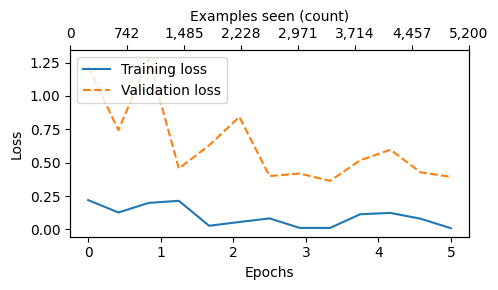

In [188]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(epochs_seen, train_values, label=f"Training {label}")
    ax.plot(epochs_seen, val_values, linestyle="--", label=f"Validation {label}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel(label.capitalize())
    ax.legend(loc="upper left")
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    xticks = ax.get_xticks()
    ax2.set_xticks(xticks)
    ex_seen_ticks = torch.linspace(examples_seen[0].item(), examples_seen[-1].item(), len(xticks))
    ex_seen_labels = [f"{int(e):,}" for e in ex_seen_ticks]
    ax2.set_xticklabels(ex_seen_labels)
    ax2.set_xlabel("Examples seen (count)")
    fig.tight_layout()
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)


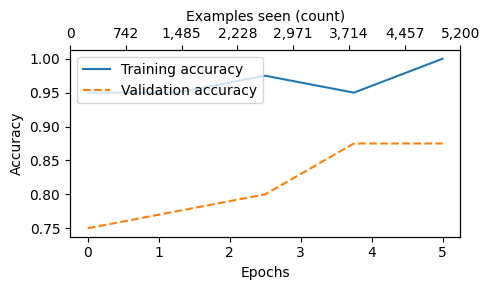

In [189]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen if isinstance(examples_seen, (int, float)) else examples_seen[-1], len(train_accs))
plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")


In [190]:
print(f"Train accs: {train_accs}")
print(f"Val accs: {val_accs}")
print(f"Length of train_accs: {len(train_accs)}")
print(f"Length of val_accs: {len(val_accs)}")

Train accs: [0.95, 0.95, 0.975, 0.95, 1.0]
Val accs: [0.75, 0.775, 0.8, 0.875, 0.875]
Length of train_accs: 5
Length of val_accs: 5


In [191]:
print(f"Epochs tensor: {epochs_tensor}")
print(f"Examples tensor: {examples_seen_tensor}")
print(f"Epochs tensor shape: {epochs_tensor.shape}")
print(f"Examples tensor shape: {examples_seen_tensor.shape}")

Epochs tensor: tensor([0.0000, 1.2500, 2.5000, 3.7500, 5.0000])
Examples tensor: tensor([   0., 1300., 2600., 3900., 5200.])
Epochs tensor shape: torch.Size([5])
Examples tensor shape: torch.Size([5])


In [192]:
# Add debug prints to your plot function:
def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    print(f"Plotting with:")
    print(f"  epochs_seen: {epochs_seen}")
    print(f"  train_values: {train_values}")
    print(f"  val_values: {val_values}")
    
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="--", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend(loc="upper right")
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Examples seen")
    
    fig.tight_layout()
    plt.show()

Plotting with:
  epochs_seen: tensor([0.0000, 1.2500, 2.5000, 3.7500, 5.0000])
  train_values: [0.95, 0.95, 0.975, 0.95, 1.0]
  val_values: [0.75, 0.775, 0.8, 0.875, 0.875]


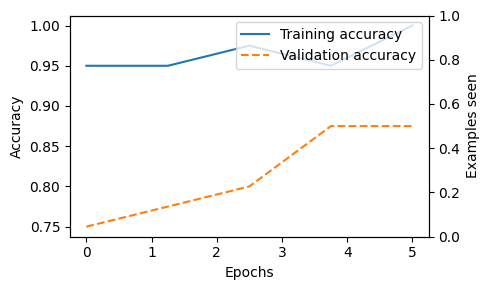

In [193]:
plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")


In [195]:
train_accuracy = calc_accuracy_loader(train_loader, scratch_gpt, device)
val_accuracy = calc_accuracy_loader(val_loader, scratch_gpt, device)
test_accuracy = calc_accuracy_loader(test_loader, scratch_gpt, device)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Training accuracy: 99.33%
Validation accuracy: 88.59%
Test accuracy: 94.33%


In [196]:
def classify_review(
    text, model, tokenizer, device, max_length=None, pad_token_id=50256
):
    model.eval()
    input_ids = tokenizer.encode(text)
    supported_context_length = model.pos_emb.weight.shape[0]
    input_ids = input_ids[:min(
        max_length if max_length is not None else supported_context_length,
        supported_context_length
    )]
    if max_length is not None:
        input_ids = [pad_token_id] * (max_length - len(input_ids)) + input_ids
    input_tensor = torch.tensor([input_ids], dtype=torch.long, device=device)
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]
        predicted_label = torch.argmax(logits, dim=-1).item()
    return "spam" if predicted_label == 1 else "not spam"


In [198]:
text_1 = (
    "You are a winner you have been specially "
    "selected to receive $1000 cash or a $2000 award."
)

print(classify_review(
    text_1, scratch_gpt, tokenizer, device, max_length=train_dataset_for_fine_tuning.max_length
))


spam


In [199]:
text_2 = (
    "Hey, just wanted to check if we're still on "
    "for dinner tonight? Let me know!"
)

print(classify_review(
    text_2, scratch_gpt, tokenizer, device, max_length=train_dataset_for_fine_tuning.max_length
))


not spam


In [200]:
torch.save(scratch_gpt.state_dict(), "review_classifier.pth")
